<a href="https://colab.research.google.com/github/fridymandita/KCBV/blob/main/Cascade_Classifier_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2022-04-13 03:43:34--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240458 (235K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 234.82K  --.-KB/s    in 0.004s  

2022-04-13 03:43:34 (52.9 MB/s) - ‘test.jpg’ saved [240458/240458]

--2022-04-13 03:43:35--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

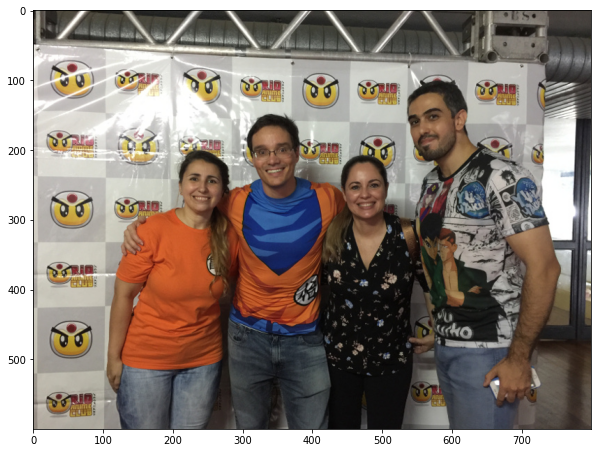

In [10]:
# Load the test image and create a greyscale copy of it to be used in the classifiers

base_image = cv2.imread('test.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

## Face Detection

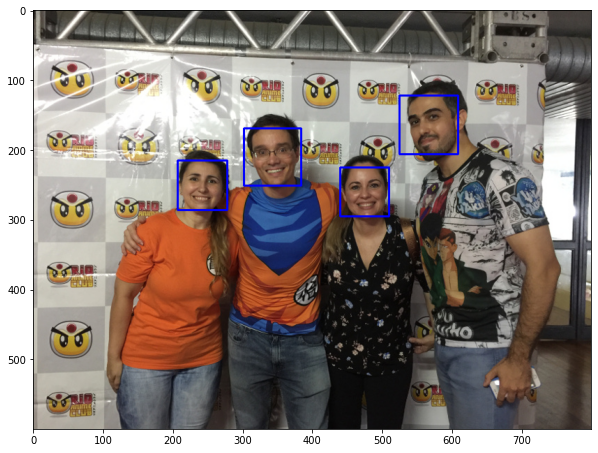

In [11]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

##Smile Detection

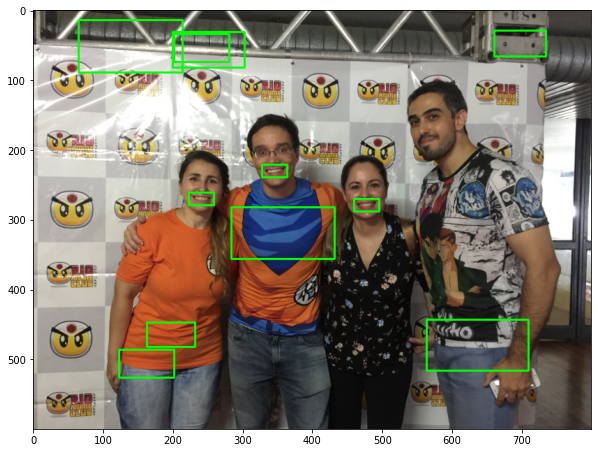

In [12]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

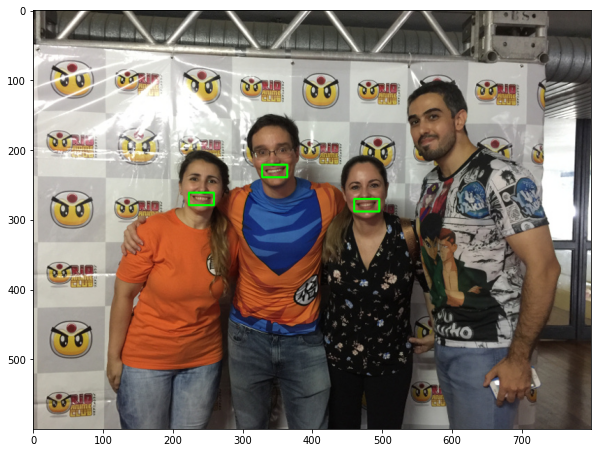

In [13]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## Eye Detection

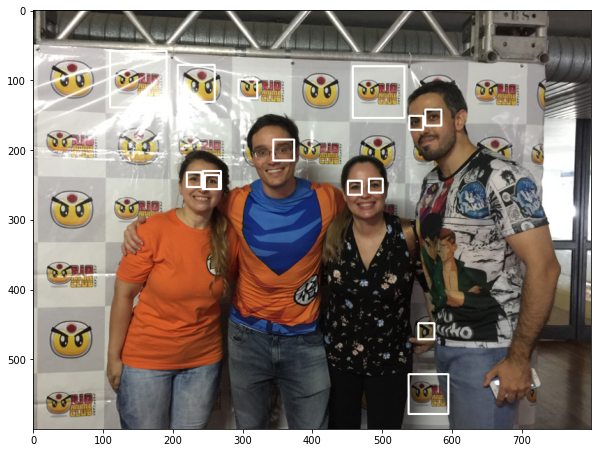

In [14]:
test_image = cv2.imread('test.jpg')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

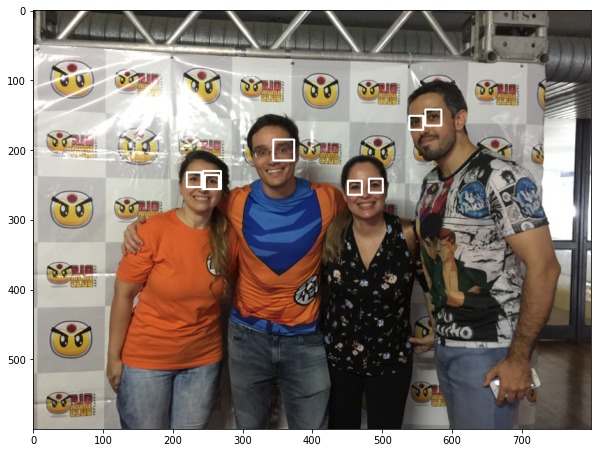

In [15]:
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## Puting All Together

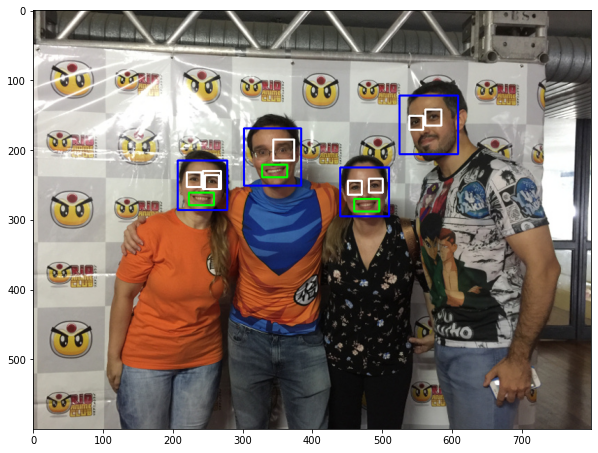

In [16]:
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))